In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('knowledge.csv')
data

,repetition_time,study_time,knowledge_level,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,0.00,0.00,very_low,NaN,NaN,NaN
1,0.24,0.90,High,NaN,NaN,NaN
2,0.25,0.33,Low,NaN,NaN,NaN
3,0.65,0.30,Middle,NaN,NaN,NaN
4,0.98,0.24,Low,NaN,NaN,NaN
...,...,...,...,...,...,...
398,0.32,0.89,High,NaN,NaN,NaN
399,0.83,0.83,High,NaN,NaN,NaN
400,0.13,0.32,Low,NaN,NaN,NaN
401,0.57,0.57,Middle,NaN,NaN,NaN


In [4]:
data = data.dropna(axis=1)
data

,repetition_time,study_time,knowledge_level
0,0.00,0.00,very_low
1,0.24,0.90,High
2,0.25,0.33,Low
3,0.65,0.30,Middle
4,0.98,0.24,Low
...,...,...,...
398,0.32,0.89,High
399,0.83,0.83,High
400,0.13,0.32,Low
401,0.57,0.57,Middle


In [5]:
data = data.drop(columns = 'knowledge_level')
data

,repetition_time,study_time
0,0.00,0.00
1,0.24,0.90
2,0.25,0.33
3,0.65,0.30
4,0.98,0.24
...,...,...
398,0.32,0.89
399,0.83,0.83
400,0.13,0.32
401,0.57,0.57


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   repetition_time  403 non-null    float64
 1   study_time       403 non-null    float64
dtypes: float64(2)
memory usage: 6.4 KB


In [7]:
data.describe()

,repetition_time,study_time
count,403.000000,403.000000
mean,0.431342,0.456360
std,0.257545,0.266775
min,0.000000,0.000000
25%,0.250000,0.250000
50%,0.330000,0.400000
75%,0.650000,0.660000
max,0.990000,0.990000


Text(0, 0.5, 'study_time')

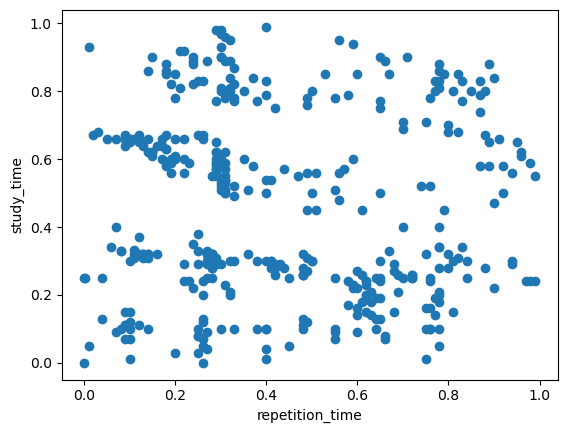

In [8]:
plt.scatter(data['repetition_time'],data['study_time'])
plt.xlabel('repetition_time')
plt.ylabel('study_time')

In [9]:
from sklearn import preprocessing
data_scaled = data.copy()
data_scaled = preprocessing.scale(data)
data_scaled[0:5]

array([[-1.67690584, -1.71277794],
       [-0.74387127,  1.66503961],
       [-0.70499483, -0.47424484],
       [ 0.8500628 , -0.58683876],
       [ 2.13298533, -0.8120266 ]])

In [10]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,8):
    kmeans = KMeans(n_clusters=i , random_state=0)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_

In [11]:
wcss

[806.0000000000002,
 481.49694043887246,
 279.17926378144443,
 164.46415134851077,
 133.15726224173324,
 111.53510905654998,
 98.24132291644966]

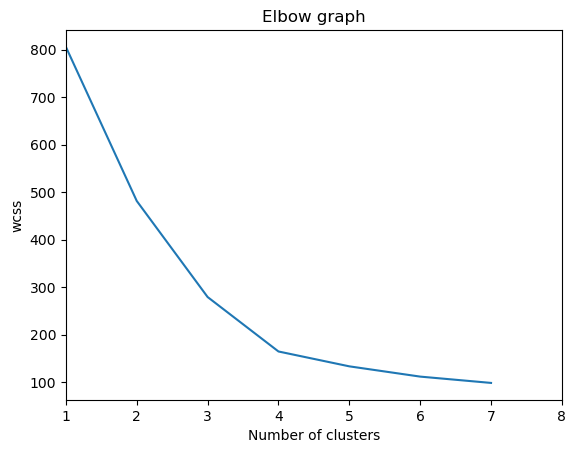

In [12]:
plt.plot(range(1,8), wcss)
plt.xlim(1,8)
plt.title('Elbow graph')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [13]:
from scipy.cluster.hierarchy import dendrogram,linkage
z = linkage(data_scaled, method='ward')

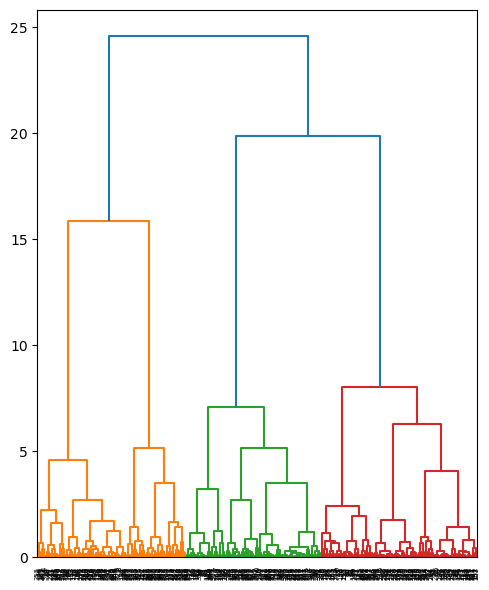

In [14]:
import matplotlib.axes as ax
fig, ax = plt.subplots(figsize = (5,6))
ax = dendrogram(z)
plt.tight_layout()
plt.show()

# agglomerative clustering

In [17]:
from sklearn.cluster import AgglomerativeClustering
training = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
training.fit(data_scaled)

AgglomerativeClustering(metric='euclidean', n_clusters=3)

In [26]:
cluster_data = data.copy()
cluster_data['prediction'] = training.fit_predict(data_scaled)


In [27]:
cluster_data

,repetition_time,study_time,prediction
0,0.00,0.00,2
1,0.24,0.90,1
2,0.25,0.33,2
3,0.65,0.30,0
4,0.98,0.24,0
...,...,...,...
398,0.32,0.89,1
399,0.83,0.83,0
400,0.13,0.32,2
401,0.57,0.57,1


In [28]:
training.labels_

array([2, 1, 2, 0, 0, 1, 1, 2, 0, 1, 1, 2, 0, 1, 1, 1, 2, 2, 2, 1, 0, 1,
       1, 2, 0, 1, 2, 2, 0, 1, 1, 0, 0, 1, 1, 2, 0, 2, 2, 1, 0, 1, 1, 0,
       2, 1, 1, 1, 0, 1, 2, 1, 0, 1, 1, 2, 0, 1, 1, 0, 0, 1, 1, 2, 0, 2,
       2, 1, 2, 1, 1, 1, 0, 1, 1, 2, 0, 2, 2, 2, 0, 1, 1, 2, 0, 2, 1, 2,
       0, 1, 1, 0, 2, 2, 1, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 1, 1, 1, 0, 1,
       2, 2, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 2, 1, 0, 0, 1, 2, 0, 0, 2, 1,
       2, 0, 1, 1, 2, 0, 1, 2, 2, 0, 1, 2, 1, 0, 2, 2, 0, 0, 1, 2, 2, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 2, 1, 1, 0, 0, 1, 2, 1, 0, 0, 1, 2,
       0, 0, 1, 1, 0, 0, 1, 2, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 2, 2, 0,
       1, 2, 2, 1, 2, 2, 0, 0, 1, 1, 2, 0, 1, 1, 0, 0, 1, 2, 2, 0, 1, 2,
       0, 0, 1, 1, 0, 0, 1, 2, 0, 0, 1, 2, 0, 0, 1, 2, 0, 1, 1, 1, 0, 0,
       1, 2, 0, 0, 1, 2, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 2, 0, 0, 0, 1, 2,
       1, 0, 0, 2, 1, 2, 0, 0, 1, 2, 0, 2, 2, 1, 1, 0, 0, 2, 1, 2, 2, 0,
       0, 2, 2, 2, 0, 0, 2, 1, 0, 0, 1, 1, 2, 2, 0,

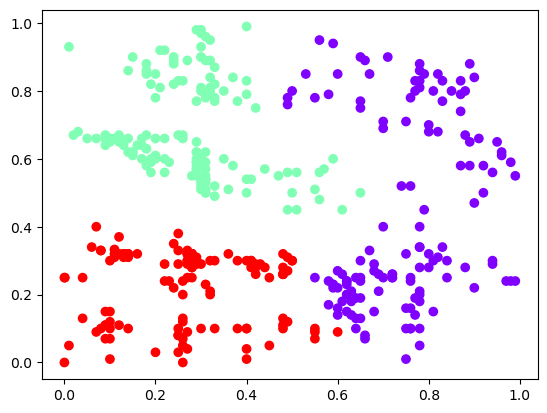

In [30]:
plt.scatter(data['repetition_time'],data['study_time'], c = cluster_data['prediction'], cmap='rainbow')

plt.xlabel=('repetition_time')
plt.ylabel=('study_time')
plt.show()